# Create a custom pdf report with multiple elements
Tested elements will include a dataframe presented as a table, a matplotlib plot and text

In [6]:
# import block
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from tqdm import tqdm
import numpy as np
import re
from matplotlib_venn import venn3
import dataframe_image as dfi

# pdf related
from reportlab.pdfgen.canvas import Canvas
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib.pagesizes import LETTER, landscape, portrait
from reportlab.platypus import *
from reportlab.lib.styles import ParagraphStyle, getSampleStyleSheet
from reportlab.lib.enums import TA_LEFT, TA_RIGHT, TA_CENTER, TA_JUSTIFY
from reportlab.lib import colors
from reportlab.lib import utils

# data 
from sklearn import datasets



Create the file canvas

In [7]:
# this creates the file, default size is A4, can be changed to letter
#c = Canvas("hello.pdf", pagesize=LETTER)
c = SimpleDocTemplate("simple_table.pdf", pagesize=LETTER)

# container for the 'Flowable' objects
width, height = LETTER
elements = []

# Add text - first two numbers determine the location on the canvas in points (1 point = 1/72 of an inch)
#canvas.drawString(72, 72, "My report")
'''c.setTitle("hello stackoverflow")
c.drawString(100, 750, "Welcome to Reportlab!")'''
stitles=ParagraphStyle(name='Section title',
                       fontSize=18)
dtitle=ParagraphStyle(name='Documnet title',
                      fontSize=32,
                      alignment=TA_CENTER)
graph_title=ParagraphStyle(name='Graph title',
                           fontSize=14)
table_title=ParagraphStyle(name='Table title', fontsize=12)
styles = getSampleStyleSheet()

# page break - anything after this command should be in the next page
#c.showPage()

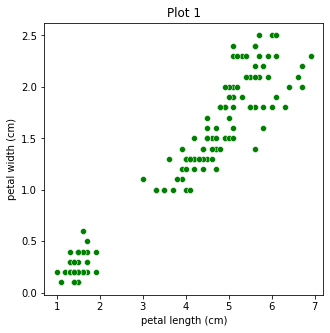

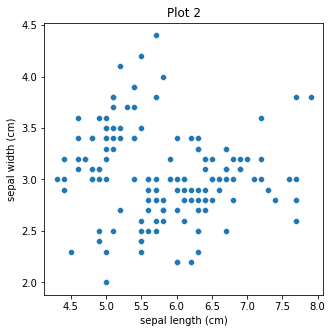

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [8]:
# make some objects to put in the pdf
iris = datasets.load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# plot 1
plt.figure(figsize=(5,5))
sns.scatterplot(x='petal length (cm)',y='petal width (cm)', data=data1, color='green')
plt.title('Plot 1')
plt.savefig('plot1.png',dpi=120)
plt.show()


# plot 2
plt.figure(figsize=(5,5))
sns.scatterplot(x='sepal length (cm)',y='sepal width (cm)', data=data1)
plt.title('Plot 2')
plt.savefig('plot2.png', dpi=120)
plt.show()

#save dataframe to image
dfimg=dfi.export(data1, 'data1.png', max_rows=10)
data1

In [9]:
# we have some elements, let's build the report
# start with plots
im1=Image('plot1.png', width=300, height=300)
im2=Image('plot2.png', width=300, height=300)
im3=Image('data1.png', width=400, height=0.6*400)

# add to the elements
elements.append(Paragraph('Growth Curve Analysis', style=dtitle))
elements.append(PageBreak())
elements.append(Spacer(1, 12))
elements.append(im1)
elements.append(im2)
elements.append(im3)



In [10]:
# save the file
c.build(elements)